# Libraries

In [1]:
import keras
from keras.preprocessing import image as kimage
from keras.applications import mobilenet_v2
from sklearn.neighbors import KDTree
import joblib

from matplotlib import pyplot as plt
import numpy as np
from time import time
import os

Using TensorFlow backend.
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kapp

# Load model

In [2]:
model = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
test_img = "./2d/pictures_new/khaled/khaled_36.png"
img = kimage.load_img(test_img, target_size=(224, 224))

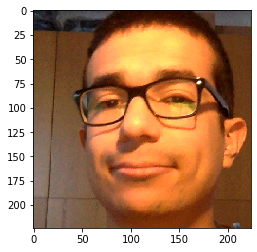

In [4]:
plt.imshow(img); plt.show()

Convert img in np array

In [5]:
x = kimage.img_to_array(img)

Preprocess img

In [6]:
x = mobilenet_v2.preprocess_input(x)

In [7]:
x = np.expand_dims(x, axis=0)

Estraggo feature

In [8]:
features = model.predict(x).flatten()
features.shape

(1280,)

In [9]:
def neural_features(img):
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = model.predict(x)
    return f.flatten()

In [13]:
# Data loader
pics_per_artist = 2
def load_data(feature_extractor, base_path):

    paths = []
    features = []
    artist_folders = os.listdir(base_path)
    for artist_folder in artist_folders:
        print(artist_folder)
        artist_path = base_path + "/" + artist_folder
        if os.path.isdir(artist_path):
            for fi,f in enumerate(sorted(os.listdir(artist_path))):
                if f.endswith('.jpg') and fi < pics_per_artist:
                    # Memorizza percorso file
                    cur_path = artist_path+"/" + f
                    paths.append(cur_path)

                    # Carica file ed estraine le features
                    image = kimage.load_img(cur_path, target_size=(224, 224))
                    cur_features = feature_extractor(image)
                    features.append(cur_features)

    features = np.array(features)
    return features, paths

In [14]:
base_path = "/Users/kappa/repositories/dsim_project/MSRA-CFW/Dataset/thumbnails_features_deduped_publish/thumbnails_features_deduped_publish"

In [15]:
t0 = time()
X_train, paths = load_data(feature_extractor=neural_features, base_path=base_path)
print("Caricamento e feature extraction in %0.3f secondi" % (time() - t0))

jessica biel
robert gates
justin timberlake
tim gunn
madhuri dixit
lara dutta
triple h
rodrigo santoro
dennis hopper
anna semenovich
freddie prinze
candice swanepoel
emily procter
prince william
julian mcmahon
demi moore
ringo starr
sharon stone
annalynne mccord
travis barker
thomas jane
michelle hunziker
daryl hannah
sonam kapoor
felix mendelssohn
christina milian
michelle rodriguez
keira knightley
bob hope
sonali bendre
roger federer
marilyn manson
leona lewis
mikao usui
rachel mcadams
ninel conde
jack johnson
john belushi
frank lampard
sharon osbourne
lionel messi
al jarreau
romy schneider
johnny cash
tom brady
gavin rossdale
paola rey
laura vandervoort
winona ryder
ann margret
namie amuro
maria grazia
napoleon dynamite
ani lorak
preity zinta
taylor momsen
tobey maguire
alison krauss
michael vartan
laura linney
edward cullen
izabella scorupco
akshay kumar
marcia cross
kurt cobain
sarah palin
brooke shields
sitting bull
patsy kensit
heidi klum
kevin federline
michelle branch
natalia 

anne murray
marc anthony
abigail breslin
carrie fisher
rainn wilson
john locke
yasmine bleeth
vidya balan
anne frank
delta goodrem
richard avedon
jeff hardy
hugh jackman
val kilmer
carlos slim
evo morales
neha dhupia
phil borges
michael bolton
jason lee
spike lee
luis royo
malcolm x
luciana salazar
novak djokovic
emily blunt
miranda lambert
jaime pressly
ayn rand
carolina ardohain
juhi chawla
florence nightingale
ed hardy
michel platini
kenny g
tupac shakur
neil diamond
hans zimmer
bill murray
jim jones
zach braff
keith urban
fat joe
geena davis
jennie garth
freddie mercury
uma thurman
bruce lee
harry truman
ben bernanke
gordon ramsay
christopher walken
jodie foster
thandie newton
annie lennox
herbie hancock
emma watson
hayley westenra
liam neeson
jay leno
eva longoria
jessica burciaga
oprah winfrey
jessica simpson
amy lee
jesse metcalfe
nelson mandela
lou reed
kristin chenoweth
barack obama
anna paquin
joanna newsom
paz vega
ernest hemingway
bow wow
fernando torres
didier drogba
kim t

lauryn hill
martina hingis
amy macdonald
lauren conrad
prime minister
larry king
merle haggard
marion jones
rachael leigh
cameron diaz
ben affleck
adriana lima
sanjay dutt
william levy
john legend
rod stewart
benedicto xvi
yasser arafat
roger moore
laura pausini
doutzen kroes
al green
bill richardson
elizabeth mitchell
natalie cole
janet jackson
sylvester stallone
meryl streep
anna maria
paula abdul
victoria silvstedt
anne heche
katrina kaif
paul anka
snoop dogg
sania mirza
heather locklear
scarlett johansson
elvis costello
jack nicholson
jake gyllenhaal
denise richards
kristin davis
john woo
theodore roosevelt
justin chatwin
rick astley
daniel radcliffe
shiri appleby
robert pattinson
cary grant
solange knowles
erica durance
harry connick
bon jovi
brittany murphy
liv tyler
maria callas
brian tracy
joe cocker
myleene klass
gavin degraw
sienna guillory
donald rumsfeld
shane west
al capone
pete doherty
ali landry
arielle kebbel
grace kelly
kim cattrall
young jeezy
raven symone
jude law
ri

In [16]:
len(paths)

3160

Albero di ricerca:

In [17]:
tree = KDTree(X_train)

In [18]:
query_features = neural_features(img)
query_features.shape

(1280,)

In [19]:
# Ricerca
dist, ind = tree.query(query_features.reshape(1, -1), k=10)

In [20]:
dist

array([[ 98.00871008,  99.99903463, 102.03655761, 105.89040096,
        105.93313444, 106.00470798, 106.64107597, 106.71141064,
        106.72508035, 107.71675859]])

In [21]:
ind

array([[3075,  904, 1681,  600, 1547, 2377,    8, 1400, 2942, 2404]])

Which people are more similar to me?

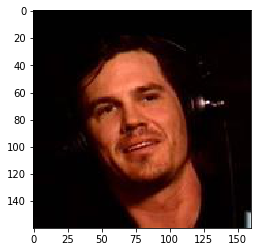

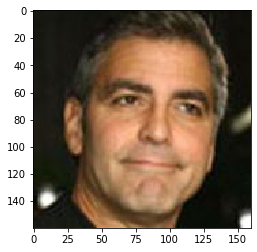

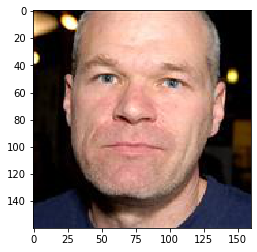

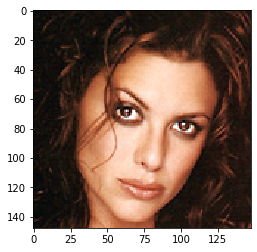

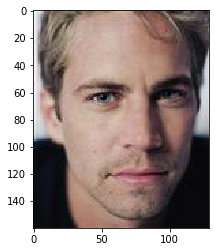

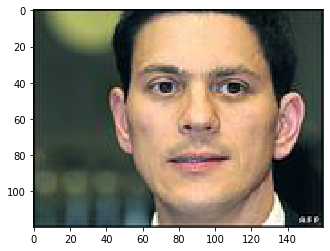

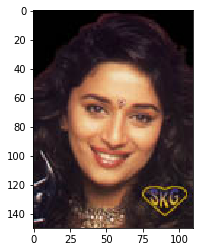

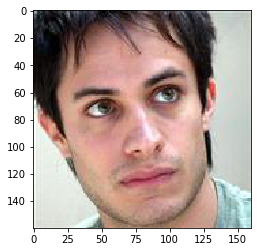

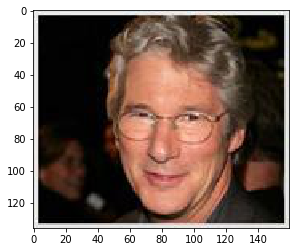

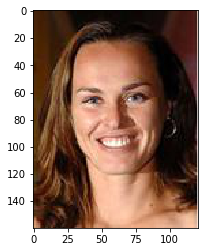

In [22]:
for i in range(10):
    img=kimage.load_img(paths[ind[0][i]])
    plt.imshow(img); plt.show()